# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [38]:
#%pip install matplotlib inline
#%pip install seaborn

In [2]:
import numpy as np

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
pd.set_option('display.max_columns', None)

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [40]:
employee=pd.read_csv('../data/Employee.csv')
employee


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [41]:
employee.describe().T

,count,mean,std,min,25%,50%,75%,max
Years,9.0,4.111111,2.803767,1.0,2.0,3.0,7.0,8.0
Salary,9.0,48.888889,16.541194,30.0,35.0,55.0,60.0,70.0


In [42]:
employee.groupby('Department')['Salary'].mean()


Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [43]:
pivot_employee_0 = employee.pivot_table(index='Department', values='Salary', aggfunc='mean')
pivot_employee_0

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [44]:
pivot_employee_1 = employee.pivot_table(index='Department', values='Salary', columns='Title', aggfunc='mean')
pivot_employee_1

Title,VP,analyst,associate
Department,,,
HR,70.0,32.5,NaN
IT,70.0,32.5,60.0
Sales,NaN,NaN,55.0


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [45]:
pivot_employee_2 = employee.pivot_table(index='Title', values='Salary', columns='Years')
pivot_employee_2

Years,1,2,3,4,7,8
Title,,,,,,
VP,NaN,NaN,NaN,NaN,NaN,70.0
analyst,35.0,30.0,NaN,35.0,NaN,NaN
associate,NaN,55.0,55.0,NaN,60.0,NaN


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [46]:
pivot_employee_3 = employee.pivot_table(index='Department', values=['Salary', 'Name'], columns='Title', aggfunc={'Salary': "mean", 'Name': "count"})
pivot_employee_3

Name                   Salary                  
Title        VP analyst associate     VP analyst associate
Department                                                
HR          1.0     2.0       NaN   70.0    32.5       NaN
IT          1.0     2.0       1.0   70.0    32.5      60.0
Sales       NaN     NaN       2.0    NaN     NaN      55.0

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [47]:
pivot_employee_4_1 = employee.pivot_table(index='Department', values='Salary', columns='Title', aggfunc={'Salary': ["median", "min", "max", "std"]})
pivot_employee_4_1

max                   median                     min          \
Title         VP analyst associate     VP analyst associate    VP analyst   
Department                                                                  
HR          70.0    35.0       NaN   70.0    32.5       NaN  70.0    30.0   
IT          70.0    35.0      60.0   70.0    32.5      60.0  70.0    30.0   
Sales        NaN     NaN      55.0    NaN     NaN      55.0   NaN     NaN   

                           std            
Title      associate   analyst associate  
Department                                
HR               NaN  3.535534       NaN  
IT              60.0  3.535534       NaN  
Sales           55.0       NaN       0.0

- HR e IT -> VP, son iguales
- IT y Sales -> associate, también tiene los mismos valores
- HR e IT -> analyst, tiene valores diferentes: max=35, median=32.5, min=30

#### Based on your comments, fill the missing values with an appropriate value

In [48]:
# no hay desviacion porque son iguales, los que dan nulos

pivot_employee_4_2 = employee.pivot_table(index='Department', values='Salary', columns='Title', aggfunc={'Salary': ["median", "min", "max", "std"]}, fill_value= 0)
pivot_employee_4_2

max                   median                   min          \
Title       VP analyst associate     VP analyst associate  VP analyst   
Department                                                              
HR          70      35         0   70.0    32.5       0.0  70      30   
IT          70      35        60   70.0    32.5      60.0  70      30   
Sales        0       0        55    0.0     0.0      55.0   0       0   

                      std                      
Title      associate   VP   analyst associate  
Department                                     
HR                 0  0.0  3.535534       0.0  
IT                60  0.0  3.535534       0.0  
Sales             55  0.0  0.000000       0.0

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [49]:
pivot_employee_5 = employee.pivot_table(index='Department', values= ['Name', 'Salary'], aggfunc={'Name': "count", 'Salary': 'sum'})
pivot_employee_5

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [50]:
pivot_employee_6 = employee.pivot_table(index='Department', values=['Years', 'Salary'], columns='Title', aggfunc={'Years': 'sum', 'Salary': 'mean'})
pivot_employee_6

Salary                   Years                  
Title          VP analyst associate    VP analyst associate
Department                                                 
HR           70.0    32.5       NaN   8.0     6.0       NaN
IT           70.0    32.5      60.0   8.0     3.0       7.0
Sales         NaN     NaN      55.0   NaN     NaN       5.0

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [51]:
# your answer here

In [52]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [3]:
fitbit=pd.read_csv('../data/Fitbit.csv')
fitbit.head()


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [4]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [6]:
fitbit.describe().T

,count,mean,std,min,25%,50%,75%,max
Calorie burned,367.0,2741.501362,916.307036,179.000,2698.000,2974.00,3233.00,4351.00
Steps,367.0,10121.588556,5594.836225,0.000,6730.500,10413.00,13916.50,26444.00
Distance,367.0,8.549128,3.409881,0.000,6.155,8.29,10.56,20.45
Floors,367.0,11.724796,10.337370,0.000,5.000,11.00,16.00,101.00
Minutes Sedentary,367.0,563.934482,294.793145,1.002,520.000,663.00,756.50,998.00
Minutes Lightly Active,367.0,236.405995,86.531376,0.000,179.000,226.00,290.00,472.00
Minutes Fairly Active,367.0,26.163488,20.319456,0.000,8.000,24.00,41.50,101.00
Minutes Very Active,367.0,35.722071,31.006682,0.000,10.500,29.00,54.00,153.00
Activity Calories,367.0,2044.147139,2041.267168,0.000,1218.500,1553.00,1927.50,9830.00
MinutesOfSleep,367.0,290.479564,154.752328,0.000,224.000,337.00,400.50,553.00


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [21]:
fitbit_num_col=fitbit.select_dtypes(include=['int64', 'float64'])
correlation = fitbit_num_col.corr()
correlation

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
Calorie burned,1.000000,0.255305,0.292790,0.130757,0.125353,0.209540,0.188256,0.197881,-0.130758,0.011485,0.041999,0.030490,0.017460
Steps,0.255305,1.000000,0.779678,0.306511,0.076906,0.393010,0.303244,0.571452,-0.160568,0.130986,0.124846,0.106591,0.133405
Distance,0.292790,0.779678,1.000000,0.382940,0.160632,0.455272,0.348113,0.759310,-0.246853,0.129442,0.130447,0.091095,0.134550
Floors,0.130757,0.306511,0.382940,1.000000,0.057812,-0.085992,0.278408,0.399503,-0.155532,0.069464,0.064587,0.043459,0.075864
Minutes Sedentary,0.125353,0.076906,0.160632,0.057812,1.000000,0.217021,0.084137,0.105963,-0.161446,0.204242,0.200589,0.178387,0.208539
Minutes Lightly Active,0.209540,0.393010,0.455272,-0.085992,0.217021,1.000000,0.014288,-0.034425,-0.219892,0.105048,0.096107,0.087150,0.105406
Minutes Fairly Active,0.188256,0.303244,0.348113,0.278408,0.084137,0.014288,1.000000,0.337839,-0.204562,0.114950,0.104303,0.100498,0.123034
Minutes Very Active,0.197881,0.571452,0.759310,0.399503,0.105963,-0.034425,0.337839,1.000000,-0.187309,0.108018,0.116559,0.099859,0.115641
Activity Calories,-0.130758,-0.160568,-0.246853,-0.155532,-0.161446,-0.219892,-0.204562,-0.187309,1.000000,-0.005804,0.010859,0.022757,-0.004992
MinutesOfSleep,0.011485,0.130986,0.129442,0.069464,0.204242,0.105048,0.114950,0.108018,-0.005804,1.000000,0.779595,0.780512,0.997184


In [22]:
correlation['Minutes Very Active']['Steps']

0.5714518481062607

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

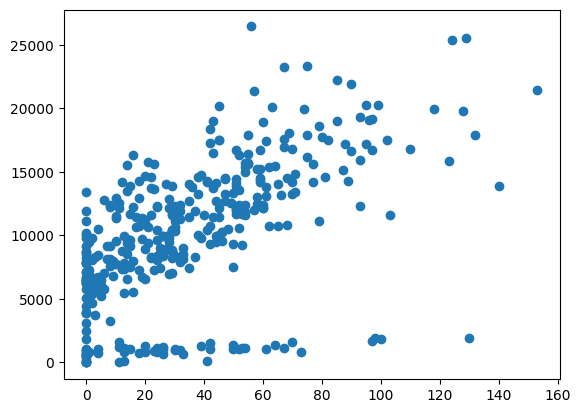

In [26]:
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps']);

#### What can you say about Minute Very Active and Steps? Write a comment below

- Por la disposición de los valores se podría decir que tienen relación. Además los valores tienden a ir de manera lineal y ascendente. Sí están relacionados 

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [27]:
correlation['Minutes Sedentary']['Steps']

0.0769060806299009

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

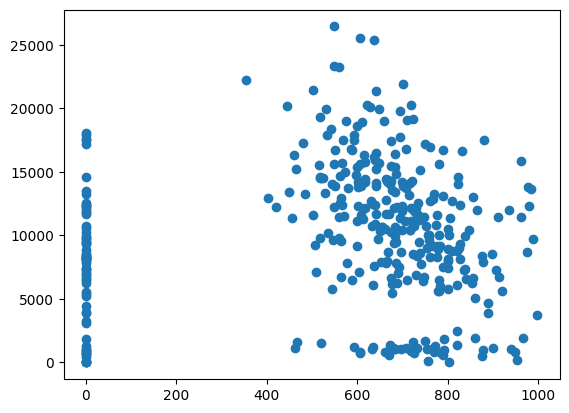

In [28]:
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps']);

- Según los datos y observaciones, con este valor: 0.07 y la imagen, parece que estos valores no tienen mucha relación entre sí

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [29]:
correlation['MinutesOfSleep']['Steps']

0.13098565950836363

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

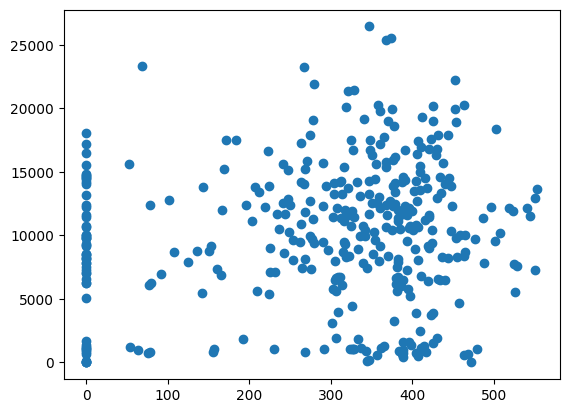

In [30]:
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps']);

- Según los datos y observaciones, con este valor: 0.13 y la imagen, parece que estos valores tienen poca relación entre sí, aunque más que con 'Minutes Sedentary'

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [40]:
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
cor_fit=correlation
cor_fit.corr()


AttributeError: 'DataFrame' object has no attribute 'column'

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [38]:
correlation.sort_values(by='Steps', ascending=False)

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
Steps,0.255305,1.000000,0.779678,0.306511,0.076906,0.393010,0.303244,0.571452,-0.160568,0.130986,0.124846,0.106591,0.133405
Distance,0.292790,0.779678,1.000000,0.382940,0.160632,0.455272,0.348113,0.759310,-0.246853,0.129442,0.130447,0.091095,0.134550
Minutes Very Active,0.197881,0.571452,0.759310,0.399503,0.105963,-0.034425,0.337839,1.000000,-0.187309,0.108018,0.116559,0.099859,0.115641
Minutes Lightly Active,0.209540,0.393010,0.455272,-0.085992,0.217021,1.000000,0.014288,-0.034425,-0.219892,0.105048,0.096107,0.087150,0.105406
Floors,0.130757,0.306511,0.382940,1.000000,0.057812,-0.085992,0.278408,0.399503,-0.155532,0.069464,0.064587,0.043459,0.075864
Minutes Fairly Active,0.188256,0.303244,0.348113,0.278408,0.084137,0.014288,1.000000,0.337839,-0.204562,0.114950,0.104303,0.100498,0.123034
Calorie burned,1.000000,0.255305,0.292790,0.130757,0.125353,0.209540,0.188256,0.197881,-0.130758,0.011485,0.041999,0.030490,0.017460
LengthOfRestInMinutes,0.017460,0.133405,0.134550,0.075864,0.208539,0.105406,0.123034,0.115641,-0.004992,0.997184,0.820110,0.817326,1.000000
MinutesOfSleep,0.011485,0.130986,0.129442,0.069464,0.204242,0.105048,0.114950,0.108018,-0.005804,1.000000,0.779595,0.780512,0.997184
MinutesOfBeingAwake,0.041999,0.124846,0.130447,0.064587,0.200589,0.096107,0.104303,0.116559,0.010859,0.779595,1.000000,0.951817,0.820110


- Los valores más relacionados con steps sin distance y minutes very active, ya que son los valores más cercanos a 1

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [63]:
time_grades=pd.read_csv('../data/Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

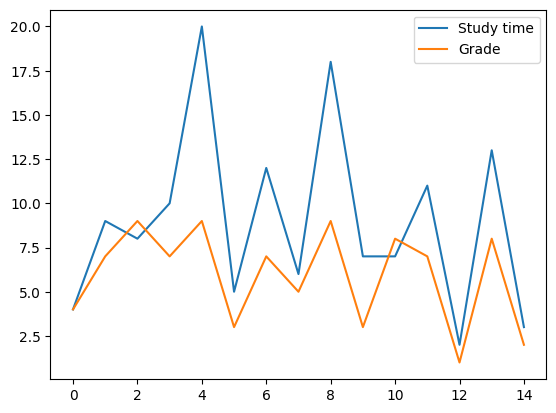

In [64]:
time_grades.plot();

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [66]:
time_grades=time_grades.select_dtypes(include=['int64'])
time_grades.corr(method='pearson')


,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [67]:
time_grades.corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


- Según ambas correlaciones la relación entre tiempo de estudio y calificaciones sí están relacionadas

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

<Axes: >

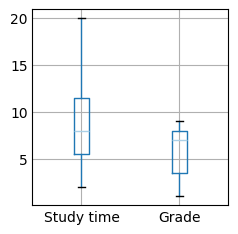

In [75]:
time_grades.boxplot()

- Según los datos podemos indicar que aunque la correlación es la misma entre ambas, los valores son más dispersos o amplios en study time, comparado con grades

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

- Pearson: evalúa la relación lineal entre dos variables continuas. Una relación es lineal cuando un cambio en una variable se asocia con un cambio proporcional en la otra variable.
- Spearman: evalúa la relación monótona entre dos variables continuas u ordinales. Las variables tienden a cambiar al mismo tiempo, pero no necesariamente a un ritmo constante. Se basa en los valores jerarquizados de cada variable y no en los datos sin procesar.